[*********************100%***********************]  5 of 5 completed


Enter your target annual return as a percentage (e.g., 10 for 10%): 30

Optimal Portfolio Allocation:
AAPL: 26.00%
AMZN: 10.78%
GOOGL: 8.72%
MSFT: 35.08%
TSLA: 19.42%

Expected Portfolio Return: 30.00%
Portfolio Volatility (Risk): 36.14%
Sharpe Ratio: 0.80


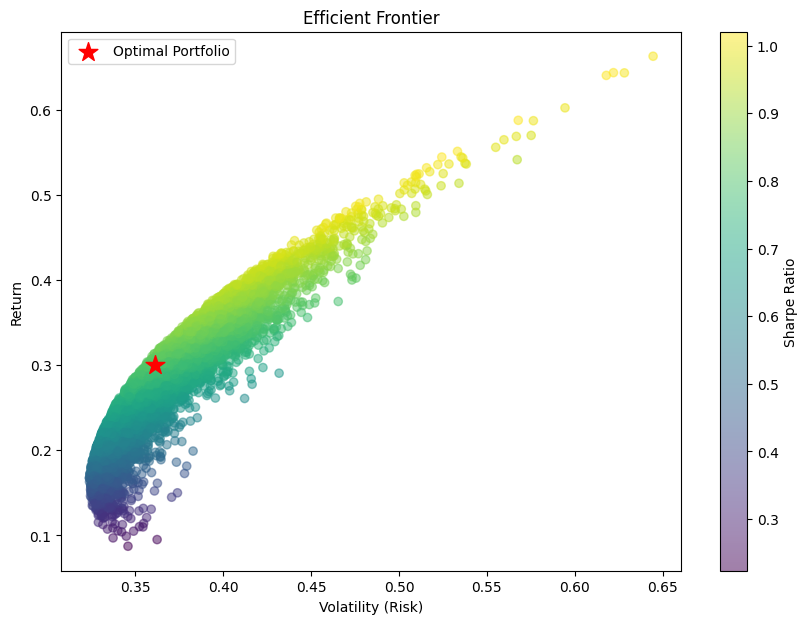

In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

class StockData:
    def __init__(self, tickers, start_date, end_date):
        self.tickers = tickers
        self.start_date = start_date
        self.end_date = end_date

    def fetch_data(self):
        data = yf.download(self.tickers, start=self.start_date, end=self.end_date)['Adj Close']
        returns = data.pct_change().dropna()
        return returns

    def calculate_statistics(self, returns):
        mean_returns = returns.mean() * 252  # Annualized mean returns
        cov_matrix = returns.cov() * 252  # Annualized covariance matrix
        return mean_returns, cov_matrix

class PortfolioOptimization:
    def __init__(self, mean_returns, cov_matrix, num_portfolios=10000, risk_free_rate=0.01):
        self.mean_returns = mean_returns
        self.cov_matrix = cov_matrix
        self.num_portfolios = num_portfolios
        self.risk_free_rate = risk_free_rate

    def generate_random_portfolios(self):
        results = np.zeros((3, self.num_portfolios))
        weights_record = []

        num_assets = len(self.mean_returns)
        for i in range(self.num_portfolios):
            weights = np.random.random(num_assets)
            weights /= np.sum(weights)  # Normalize to make sum of weights = 1
            weights_record.append(weights)

            portfolio_return = np.dot(weights, self.mean_returns)
            portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(self.cov_matrix, weights)))
            results[0, i] = portfolio_stddev  # Volatility (Risk)
            results[1, i] = portfolio_return  # Return
            results[2, i] = (portfolio_return - self.risk_free_rate) / portfolio_stddev  # Sharpe Ratio

        return results, weights_record

    def get_optimal_portfolio(self, target_return=None, target_risk=None):
        """
        Given a target return or risk, find the optimal portfolio close to the desired target.
        """
        results, weights_record = self.generate_random_portfolios()
        portfolios = pd.DataFrame(results.T, columns=['Risk', 'Return', 'Sharpe'])

        if target_return is not None:
            # Find the portfolio closest to the target return
            portfolios['Difference'] = abs(portfolios['Return'] - target_return)
            optimal_portfolio = portfolios.loc[portfolios['Difference'].idxmin()]
        elif target_risk is not None:
            # Find the portfolio closest to the target risk (volatility)
            portfolios['Difference'] = abs(portfolios['Risk'] - target_risk)
            optimal_portfolio = portfolios.loc[portfolios['Difference'].idxmin()]
        else:
            raise ValueError("Either target_return or target_risk must be provided.")

        optimal_weights = weights_record[portfolios.index.get_loc(optimal_portfolio.name)]
        return optimal_portfolio, optimal_weights, results

    def plot_efficient_frontier(self, results, optimal_portfolio):
        plt.figure(figsize=(10, 7))
        plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis', alpha=0.5)
        plt.colorbar(label='Sharpe Ratio')
        plt.xlabel('Volatility (Risk)')
        plt.ylabel('Return')
        plt.title('Efficient Frontier')

        # Plot the optimal portfolio
        plt.scatter(optimal_portfolio['Risk'], optimal_portfolio['Return'], color='red', marker='*', s=200, label="Optimal Portfolio")
        plt.legend()

        plt.show()

# Example usage
tickers = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA']
start_date = '2020-01-01'
end_date = '2023-01-01'

stock_data = StockData(tickers, start_date, end_date)
returns = stock_data.fetch_data()
mean_returns, cov_matrix = stock_data.calculate_statistics(returns)

portfolio_optimization = PortfolioOptimization(mean_returns, cov_matrix)

# Ask user for preferences
target_return = float(input("Enter your target annual return as a percentage (e.g., 10 for 10%): ")) / 100
target_risk = None  # You can choose to give priority to risk instead of return

# Get optimal portfolio
optimal_portfolio, optimal_weights, results = portfolio_optimization.get_optimal_portfolio(target_return=target_return)

# Show results
print("\nOptimal Portfolio Allocation:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight*100:.2f}%")

print(f"\nExpected Portfolio Return: {optimal_portfolio['Return']*100:.2f}%")
print(f"Portfolio Volatility (Risk): {optimal_portfolio['Risk']*100:.2f}%")
print(f"Sharpe Ratio: {optimal_portfolio['Sharpe']:.2f}")

# Ensure the target return is achievable
min_return = min(results[1, :])
max_return = max(results[1, :])

if target_return < min_return or target_return > max_return:
    print(f"Warning: The target return of {target_return*100}% is outside the achievable range ({min_return*100}% to {max_return*100}%).")
else:
    # Plot the efficient frontier with optimal portfolio
    portfolio_optimization.plot_efficient_frontier(results, optimal_portfolio)




```
    1. Describe the code, the purpose of each class, and the purpose of each method within each class.
    2. Print the file obtained from the API.
    3. What is the use cases of this application?
```

